In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [66]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [67]:
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [68]:
n = X.shape[0]
n

10

In [69]:
b = (np.mean(X * y) - np.mean(X) * np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b

2.620538882402765

In [70]:
a = np.mean(y) - b * np.mean(X)
a

444.1773573243596

In [71]:
X_resh = X.reshape(1,10)
X_resh

array([[ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]])

In [72]:
y_resh = y.reshape(1,10)
y_resh

array([[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

In [73]:
X_resh.T

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [74]:
b1 = np.dot(np.dot(np.linalg.inv(np.dot(X_resh, X_resh.T)), X_resh), y_resh.T)
b1

array([[5.88982042]])

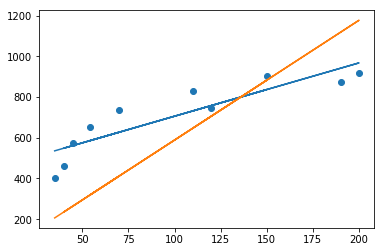

In [75]:
plt.scatter(X, y)
plt.plot(X, a + b * X)
plt.plot(X, b1[0] * X)

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [76]:
def mse_(W1, y=y, X=X, n=n):
    return np.sum((W1 * X - y)**2) / n

In [77]:
mse_(5.88982042)

56516.85841571943

In [84]:
mse_(2.620538882402765)

203763.93896082853

In [85]:
alpha = 1e-6

In [86]:
W1 = 0.1

In [87]:
f = 1/n * np.sum((W1 * X - y)**2)

In [88]:
f_p = 2/n * np.sum((W1 * X - y) * X)

In [89]:
mse_min = mse_(W1)
for i in range(1000):
    W1 -= alpha * 2/n * np.sum((W1 * X - y) * X)
    if i%100 == 0:
        print(f"iter = {i}, W1 = {W1}, mse = {mse_(W1)}")
        if mse_(W1) < mse_min:
            mse_min = mse_(W1)
            W1_optimal = W1
print (f"W1_optimal = {W1_optimal}, mse_min = {mse_min}")

iter = 0, W1 = 0.25952808, mse = 493237.7212546963
iter = 100, W1 = 5.54537842245223, mse = 58151.31823171113
iter = 200, W1 = 5.868748638669329, mse = 56522.97550129376
iter = 300, W1 = 5.888531320728348, mse = 56516.88130936019
iter = 400, W1 = 5.8897415574471985, mse = 56516.85850140053
iter = 500, W1 = 5.889815595583751, mse = 56516.858416040064
iter = 600, W1 = 5.889820124983314, mse = 56516.85841572062
iter = 700, W1 = 5.889820402076462, mse = 56516.85841571941
iter = 800, W1 = 5.88982041902807, mse = 56516.8584157194
iter = 900, W1 = 5.889820420065112, mse = 56516.85841571941
W1_optimal = 5.88982041902807, mse_min = 56516.8584157194


3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Таблица критических точек распределения Стьюдента используется на небольших объемах выборок, когда известны выборочная дисперсия и выборочное среднеквадратическое отклонение. А таблица значений функции Лапласа используется когда известны дисперсия и среднеквадратическое отклонение генеральной совокупности, либо когда у нас большое количество измерений.

*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).